# Introduction
Welcome to the Cyclistic bike-share case study! this case study is a Capstone project of **Google Data Analytics Professional certificate**.
* I will perform the 6 phases of Data analysis process (**Ask - Prepare - Process - Analyze - Share - Act**) on this case study, To help the marketing team design a new and creative startegy.
* Also provide the company with with compelling insights and meaningful data visualizations.

**Title: Cyclistic Case Study  
Author: Khaled Orabi  
Date: 7 July 2023**

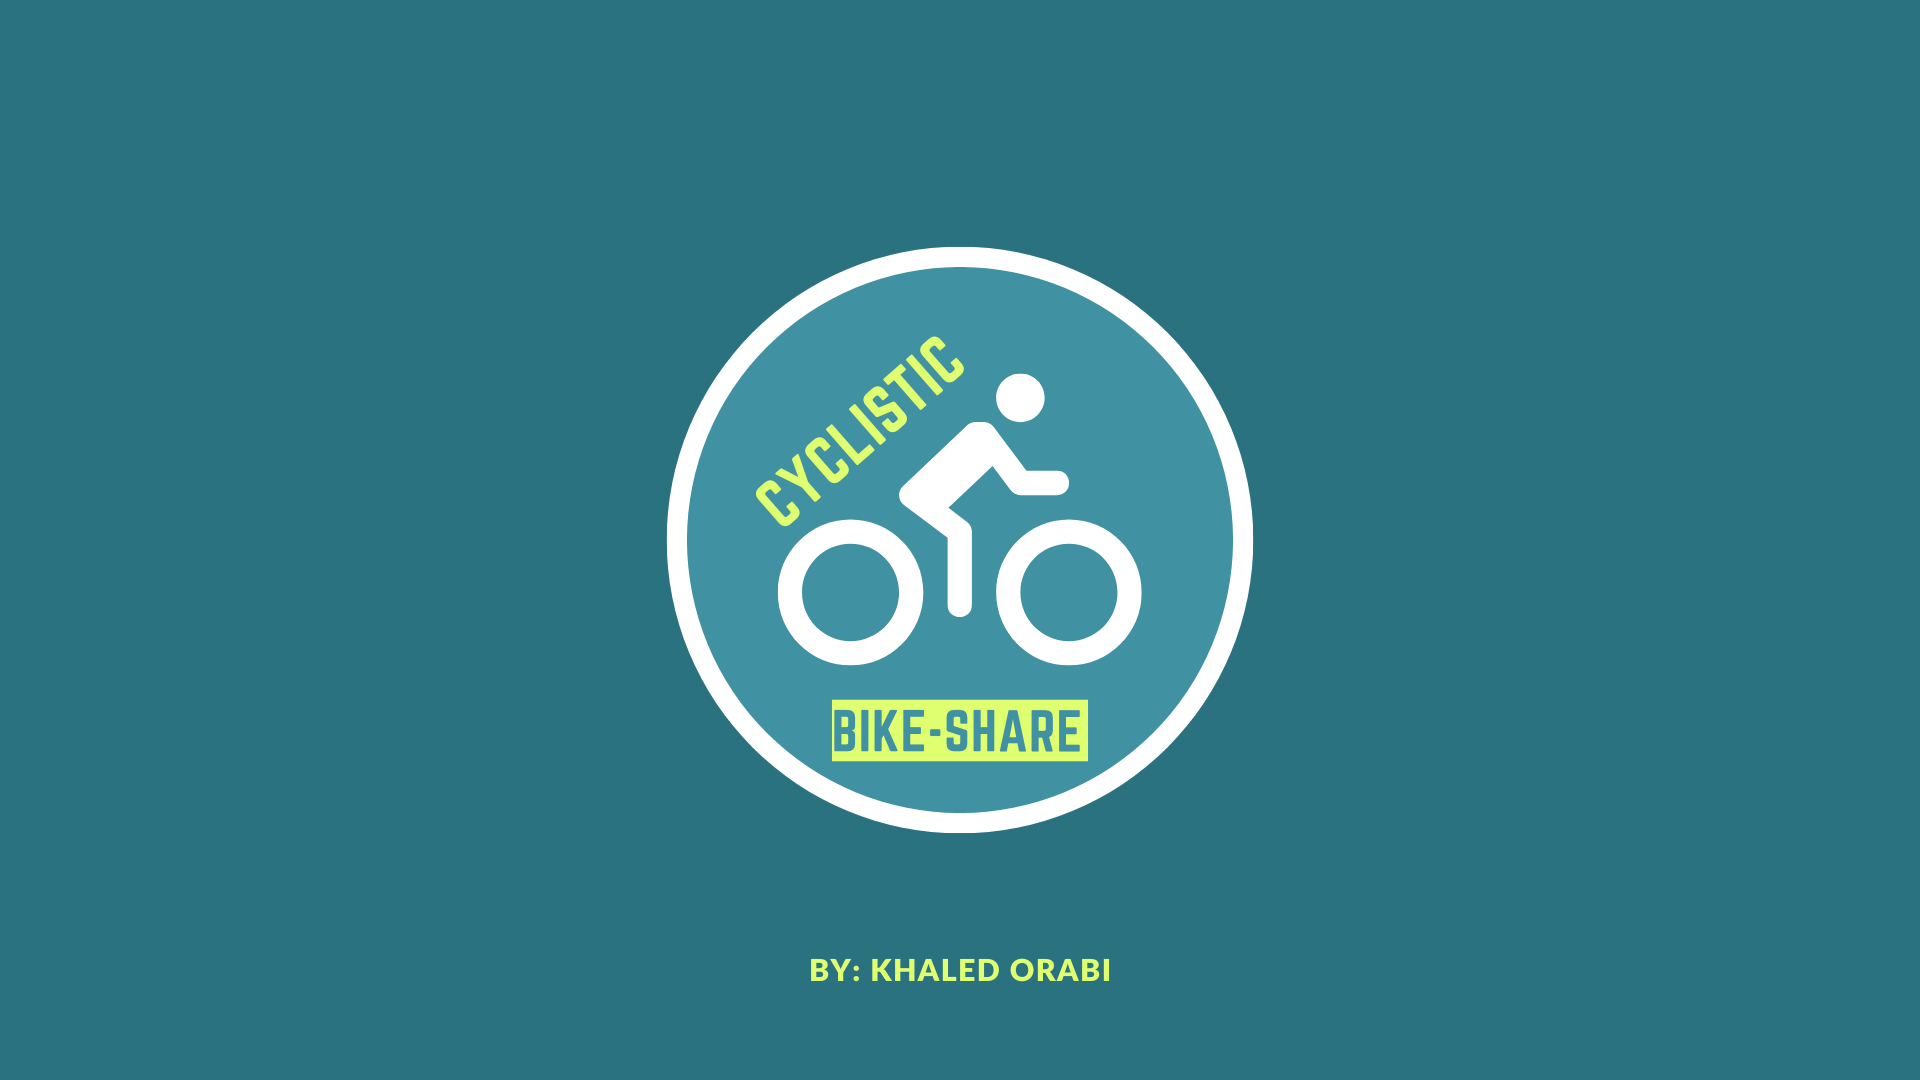



## Backgorund
* Cyclistic bike-share program has grown to a fleet of 5,824 bicycles that are locked into a network of 692 stations across Chicago.
* Bike can unlocked from one station and return to another one.
* Cyclistc has plenty of pricing plans:
	> **Single-ride**
	> **Full-day**

	Customers of those plans are referred as **casual riders**
	>**Annual memberships**
	
	Customers who purchase  this plan referred as **memebers** 

---
## Scenario
As a data analyst working with the marketing team at Cyclistic company in Chicago. The director believes that the comapany's success depends on maximizing the number of the annual memberships. Therefore the marketing team wants to understand how casual riders and anuual members use Cyclistic bikes differently to design a new strategy. So I will develop some recommendations for the marketing team reinforced with good data insights and attractive visualizations.

---
## Stakeholders
* **Lily Moreno**: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program.  

* **Cyclistic executive team**: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.  

---
## Main objectives
 1. How do annual members and casual riders use Cyclistic bikes differently?
 2. Why would casual riders buy Cyclistic annual memberships?
 3. How can Cyclistic use digital media to influence casual riders to become members?
 
 ---  
### Let's get into the Analysis Process 
![Work on your next Data Analytics project in 6 steps | by Chitranjan Gupta |  CodeX | Medium](https://miro.medium.com/v2/resize:fit:1400/1*4h7ahFBqnaFHeWibHWOl7w.png)
## Ask

**Main objectives for the marketing team:**
 1. How do annual members and casual riders use Cyclistic bikes differently?
 2. Why would casual riders buy Cyclistic annual memberships?
 3. How can Cyclistic use digital media to influence casual riders to become members?  
 
>Moreno has assigned me the first question to answer: **How do annual members and casual riders use Cyclistic bikes differently?**
 

Our main Business Task or the main research question we want to answer is **How do annual members and casual riders use Cyclistic bikes differently?**

---
## Prepare  
### Data Source / Location
We will **collect and gather** Cyclistic’s historical trip data to **analyze and identify trends** from this [Source](https://divvy-tripdata.s3.amazonaws.com/index.html)

This is a Public data a has been made available by **Motivate International Inc** (Under this [**License**](https://ride.divvybikes.com/data-license-agreement))

#### Does our data ROCCC ?
* A good data source is **ROCCC** which stands for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.

	 1. **R**eliable - Yes it is, since the the bike-share company **is the parent** of data provider Inc.
	 2. **O**riginal - Yes!, because of it's reliability we can ensure that our data is original
	 3. **C**omprehensive - Yes we got most of the information we neeed to solve the problem
	 4. **C**urrent - Yes, Because our data is new, we got 1 year worth of data **(From: 2022-06 To: 2023-05)**
	 5. **C**ited - Yes 

	So i think our data **ROCCC**s 
### Data Orgnaization
we stored our data into one data frame after merging the 12 CSV files into one CSV file.
Here in my case i used python because it's a bit faster so here the **code** i used to merge the files:
```python
import pandas as pd
import glob
file_paths = glob.glob(".../datasets/*.csv")  # Add your 12 month dataset files into one file and put the directory instead of the (...)
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)
merged_df = pd.concat(dfs, axis=0, ignore_index=True)
merged_df.to_csv(".../datasets/ready_trip_data.csv", index=False)
```

**Note:** you can use R to achieve the last step if you want

## Process 
I used R because it is usually preferred for data visualization as it offers flexibility and minimum required coding through its packages.  
Let's get into it.

In [2]:
library(tidyverse)

In [3]:
file_paths <- read_csv(".../Google-Data-Analytics-Capstone/ready_trip_data.csv")
head(file_paths)

Parsed with column specification:
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
600CFD130D0FD2A4,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,NA,NA,NA,NA,41.89,-87.62,41.91,-87.62,casual
F5E6B5C1682C6464,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,NA,NA,NA,NA,41.91,-87.62,41.93,-87.63,casual
B6EB6D27BAD771D2,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,NA,NA,NA,NA,41.91,-87.65,41.89,-87.61,casual
C9C320375DE1D5C6,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,NA,NA,NA,NA,41.80,-87.66,41.80,-87.65,casual
56C055851023BE98,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,NA,NA,NA,NA,41.91,-87.63,41.93,-87.64,casual
B664188E8163D045,electric_bike,2022-06-30 16:42:10,2022-06-30 16:58:22,NA,NA,NA,NA,42.03,-87.71,42.06,-87.73,casual


* First we will drop any records with NA values and duplicate records

In [4]:
trip_data <- drop_na(file_paths)
trip_data <- trip_data[ !duplicated (trip_data), ] 

* It's time to **explore** our data after some **cleaning**

In [5]:

print("-----------Dataframe Glimpse--------------")
glimpse(trip_data)
print("-----------Display dataframe head--------------")
head(trip_data)

[1] "-----------Dataframe Glimpse--------------"
Observations: 4,494,681
Variables: 13
$ ride_id            <chr> "B12AD6565494C368", "BAD4CB075003A605", "76DAD9F...
$ rideable_type      <chr> "classic_bike", "electric_bike", "electric_bike"...
$ started_at         <dttm> 2022-06-09 22:28:32, 2022-06-19 17:08:23, 2022-...
$ ended_at           <dttm> 2022-06-09 22:52:17, 2022-06-19 17:08:25, 2022-...
$ start_station_name <chr> "California Ave & Milwaukee Ave", "California Av...
$ start_station_id   <chr> "13084", "13084", "20222", "637", "13256", "1308...
$ end_station_name   <chr> "California Ave & Milwaukee Ave", "California Av...
$ end_station_id     <chr> "13084", "13084", "20222", "13256", "13256", "13...
$ start_lat          <dbl> 41.92269, 41.92261, 41.70463, 41.89561, 41.90303...
$ start_lng          <dbl> -87.69715, -87.69715, -87.52841, -87.67210, -87....
$ end_lat            <dbl> 41.92269, 41.92269, 41.70458, 41.90303, 41.90303...
$ end_lng            <dbl> -87.69715, -87.69

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
B12AD6565494C368,classic_bike,2022-06-09 22:28:32,2022-06-09 22:52:17,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.92269,-87.69715,41.92269,-87.69715,casual
BAD4CB075003A605,electric_bike,2022-06-19 17:08:23,2022-06-19 17:08:25,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.92261,-87.69715,41.92269,-87.69715,casual
76DAD9FC95774B53,electric_bike,2022-06-26 23:59:44,2022-06-27 00:25:26,Burnham Greenway & 105th St,20222,Burnham Greenway & 105th St,20222,41.70463,-87.52841,41.70458,-87.52823,casual
47DE68ACCA138C13,electric_bike,2022-06-27 11:40:53,2022-06-27 11:50:16,Wood St & Chicago Ave,637,California Ave & Division St,13256,41.89561,-87.67210,41.90303,-87.69747,casual
5D899636D3334ED5,classic_bike,2022-06-27 16:01:13,2022-06-27 16:35:56,California Ave & Division St,13256,California Ave & Division St,13256,41.90303,-87.69747,41.90303,-87.69747,casual
7A163D957F8CF0DD,classic_bike,2022-06-19 22:29:14,2022-06-19 22:29:57,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.92269,-87.69715,41.92269,-87.69715,casual


After cleaning the data I noticed that most of the columns has good name conventions except the following: `rideable_type`, `started_at`, `ended_at` and `member_casual` .
Let's rename them.

In [6]:
trip_data <- trip_data  %>% 
    rename (
        bike_type = rideable_type,
        start_time = started_at,
        end_time = ended_at,
        customer_type = member_casual
    )
colnames(trip_data)

[1] "ride_id"            "bike_type"          "start_time"        
 [4] "end_time"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "customer_type"

I will calculate the **length of each ride** by subtracting the column `start_time` from the column `end_time` to get some insights of the customers *RideTime*

In [7]:
trip_data $ ride_time <- trip_data$end_time - trip_data$start_time

* Checking if the column has been added

In [8]:
colnames(trip_data)

[1] "ride_id"            "bike_type"          "start_time"        
 [4] "end_time"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "customer_type"      "ride_time"

In [121]:
# we will add 2 columns contain weekday and month
trip_data$weekday <- format(trip_data$start_time, "%A")
trip_data$month <- format(trip_data$start_time, "%Y - %m (%b)" )
trip_data$hour <- strftime(trip_data$start_time, "%H")

 I want to make sure that we got the right day names

In [122]:
head(trip_data)

ride_id,bike_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,customer_type,ride_time,weekday,month,hour
B12AD6565494C368,classic_bike,2022-06-09 22:28:32,2022-06-09 22:52:17,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.92269,-87.69715,41.92269,-87.69715,casual,1425,Thursday,2022 - 06 (Jun),00
76DAD9FC95774B53,electric_bike,2022-06-26 23:59:44,2022-06-27 00:25:26,Burnham Greenway & 105th St,20222,Burnham Greenway & 105th St,20222,41.70463,-87.52841,41.70458,-87.52823,casual,1542,Sunday,2022 - 06 (Jun),01
47DE68ACCA138C13,electric_bike,2022-06-27 11:40:53,2022-06-27 11:50:16,Wood St & Chicago Ave,637,California Ave & Division St,13256,41.89561,-87.67210,41.90303,-87.69747,casual,563,Monday,2022 - 06 (Jun),13
5D899636D3334ED5,classic_bike,2022-06-27 16:01:13,2022-06-27 16:35:56,California Ave & Division St,13256,California Ave & Division St,13256,41.90303,-87.69747,41.90303,-87.69747,casual,2083,Monday,2022 - 06 (Jun),18
32C67769462EDF7B,classic_bike,2022-06-20 16:24:51,2022-06-20 16:33:39,California Ave & Division St,13256,California Ave & Milwaukee Ave,13084,41.90303,-87.69747,41.92269,-87.69715,casual,528,Monday,2022 - 06 (Jun),18
ED5BCFCCF7BC19E0,electric_bike,2022-06-20 17:12:43,2022-06-20 18:22:51,Morgan Ave & 14th Pl,TA1306000002,Morgan Ave & 14th Pl,TA1306000002,41.86242,-87.65116,41.86238,-87.65106,casual,4208,Monday,2022 - 06 (Jun),19


First of all I got the right names of the weekdays.

* Oh!, I saw something when exploring the data in the last cell:
    
    Some **ride_time**'s values are really short i.e.: 2secs , 43secs. And I think that bike_ride 's  time worth more time :).  Maybe it was someone making sure the bike 
         locked at the station, change his mind about the ride or the bike was up for checking by Divvy(the company owns the bikes).
         
**I think a good solution we can apply here is that we delete every record that got less than 1 minute ride_time**

In [123]:
trip_data <- filter(trip_data, ride_time >= 60)

In [124]:
glimpse(trip_data)

Observations: 4,403,180
Variables: 17
$ ride_id            <chr> "B12AD6565494C368", "76DAD9FC95774B53", "47DE68A...
$ bike_type          <chr> "classic_bike", "electric_bike", "electric_bike"...
$ start_time         <dttm> 2022-06-09 22:28:32, 2022-06-26 23:59:44, 2022-...
$ end_time           <dttm> 2022-06-09 22:52:17, 2022-06-27 00:25:26, 2022-...
$ start_station_name <chr> "California Ave & Milwaukee Ave", "Burnham Green...
$ start_station_id   <chr> "13084", "20222", "637", "13256", "13256", "TA13...
$ end_station_name   <chr> "California Ave & Milwaukee Ave", "Burnham Green...
$ end_station_id     <chr> "13084", "20222", "13256", "13256", "13084", "TA...
$ start_lat          <dbl> 41.92269, 41.70463, 41.89561, 41.90303, 41.90303...
$ start_lng          <dbl> -87.69715, -87.52841, -87.67210, -87.69747, -87....
$ end_lat            <dbl> 41.92269, 41.70458, 41.90303, 41.90303, 41.92269...
$ end_lng            <dbl> -87.69715, -87.52823, -87.69747, -87.69747, -87....
$ customer_typ

* Convert ride_time column to numeric (in seconds)

In [125]:
trip_data$ride_time <- as.numeric(trip_data$ride_time)
min(trip_data$ride_time)

[1] 60

#### Now we can step to the Analyze phase
----
## Analyze Phase  
In this phase we will perform some calculations:
* summarizing the data as whole

In [126]:
summary(trip_data)

   ride_id           bike_type           start_time                 
 Length:4403180     Length:4403180     Min.   :2022-06-01 00:00:04  
 Class :character   Class :character   1st Qu.:2022-07-25 16:03:11  
 Mode  :character   Mode  :character   Median :2022-09-21 08:19:47  
                                       Mean   :2022-10-26 12:13:19  
                                       3rd Qu.:2023-02-02 17:19:20  
                                       Max.   :2023-05-31 23:59:49  
    end_time                   start_station_name start_station_id  
 Min.   :2022-06-01 00:02:38   Length:4403180     Length:4403180    
 1st Qu.:2022-07-25 16:23:32   Class :character   Class :character  
 Median :2022-09-21 08:31:58   Mode  :character   Mode  :character  
 Mean   :2022-10-26 12:29:56                                        
 3rd Qu.:2023-02-02 17:30:10                                        
 Max.   :2023-06-07 23:04:26                                        
 end_station_name   end_station_id

Conduct Descriptive Analysis on Both `ride_time` and `customer_type`  
Also considering any other factors that could affect `ride_time` like: `bike_type`

In [127]:
print("Mean")
aggregate(trip_data$ride_time ~ trip_data$customer_type, FUN = mean)
print("Median")
aggregate(trip_data$ride_time ~ trip_data$customer_type, FUN = median)
print("Max")
aggregate(trip_data$ride_time ~ trip_data$customer_type, FUN = max)
print("Min")
aggregate(trip_data$ride_time ~ trip_data$customer_type, FUN = min)

[1] "Mean"


trip_data$customer_type,trip_data$ride_time
casual,1386.159
member,747.934


[1] "Median"


trip_data$customer_type,trip_data$ride_time
casual,800
member,537


[1] "Max"


trip_data$customer_type,trip_data$ride_time
casual,1922127
member,89872


[1] "Min"


trip_data$customer_type,trip_data$ride_time
casual,60
member,60


* Find each customer type count in our data

In [88]:
trip_data %>% 
    group_by(customer_type)  %>% 
    summarise(count = length (ride_id), '%' = (length(ride_id)/ nrow(trip_data)) * 100)

customer_type,count,%
casual,1718350,39.0252
member,2684830,60.9748


In [93]:
# Ridership data by type each weekday
trip_data %>% 
    group_by(customer_type, weekday) %>% 
    summarise(num_of_rides = n(), avg_duration = mean(ride_time)) %>% 
    arrange(customer_type, weekday)

customer_type,weekday,num_of_rides,avg_duration
casual,Sunday,284612,1596.8292
casual,Monday,191664,1392.2276
casual,Tuesday,198959,1245.6676
casual,Wednesday,214430,1197.0414
casual,Thursday,229800,1230.7811
casual,Friday,253829,1330.3455
casual,Saturday,345056,1552.0882
member,Sunday,296778,835.8823
member,Monday,365980,709.2876
member,Tuesday,429276,716.1869


In [94]:
# Ridership data by type each month
trip_data %>% 
    group_by(customer_type, month) %>% 
    summarise(num_of_rides = n(), avg_duration = mean(ride_time)) %>% 
    arrange(customer_type, month)

customer_type,month,num_of_rides,avg_duration
casual,2022 - 06 (Jun),287553,1524.2918
casual,2022 - 07 (Jul),306612,1529.9960
casual,2022 - 08 (Aug),265748,1419.4459
casual,2022 - 09 (Sep),217485,1328.4413
casual,2022 - 10 (Oct),148865,1247.9273
casual,2022 - 11 (Nov),72366,1051.1038
casual,2022 - 12 (Dec),30979,905.1109
casual,2023 - 01 (Jan),29021,910.6819
casual,2023 - 02 (Feb),32142,1080.7493
casual,2023 - 03 (Mar),45739,1025.6859


We did some small calculations to get a summary of our analysis now we move to the next phase

## Share

The share phase is about sharing the analysis and visualizations with the stake holders.


In [89]:
# This function help to resize the plots
fig <- function(width, heigth){options(repr.plot.width = width, repr.plot.height = heigth)}

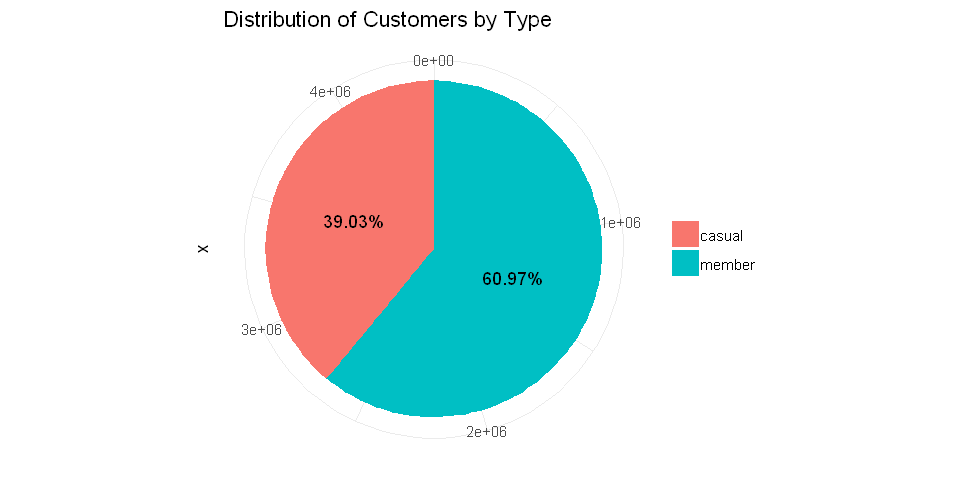

In [90]:
# plot each customer type (casual / member)
fig(8,4)
customer_percentages <- trip_data %>%
  count(customer_type) %>%
  mutate(percentage =round( n / sum(n) * 100 , 2))

ggplot(data = customer_percentages, aes(x = "", y = n , fill = customer_type)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(fill = "Customer Type", title = "Distribution of Customers by Type") +
  geom_text(aes(label = paste0(percentage, "%"), angle = 0), position = position_stack(vjust = 0.5))+
  theme_minimal()+
  theme(axis.title.x = element_blank(), legend.title = element_blank())

As we can see that Member got the bigger portion of the dataset, member ~61% ,casual ~39%

In [91]:
# Order the days in weekday column to get ordered result like the following: 
trip_data$weekday <- ordered(trip_data$weekday, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

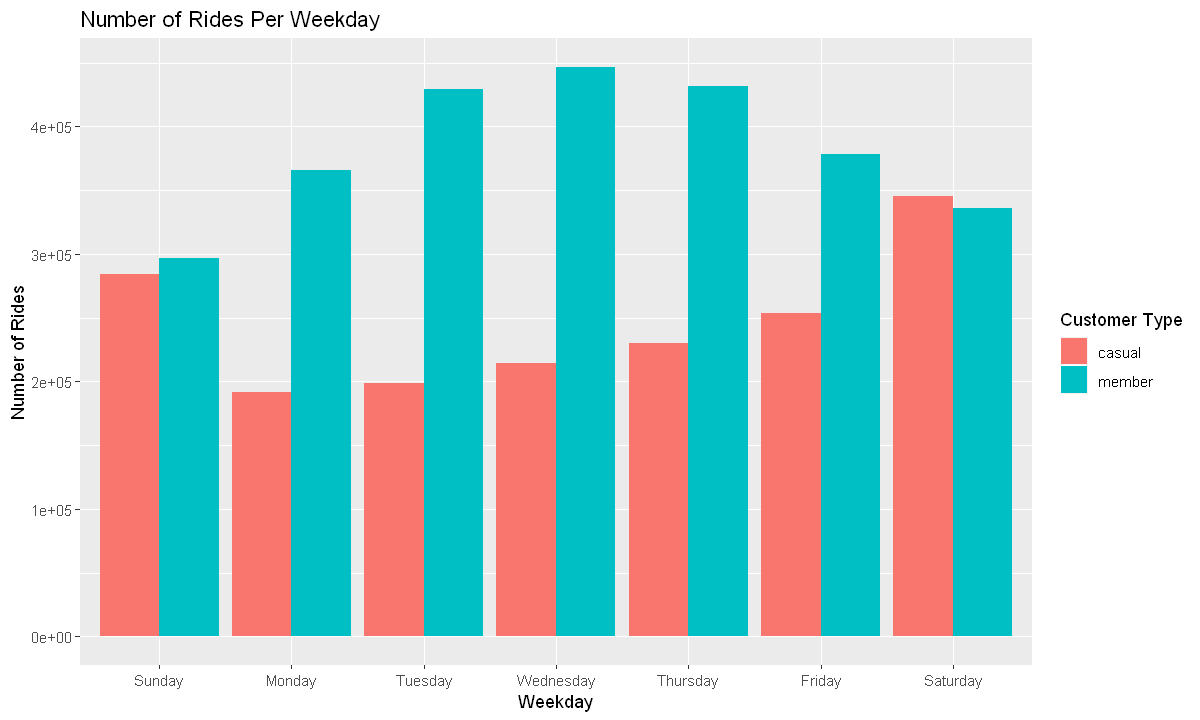

In [115]:
# Visualize Number_of_rides by weekdays
fig(10,6)
trip_data %>% 
    group_by(customer_type, weekday) %>% 
    summarise(number_of_rides = n(), average_duration = mean(ride_time)) %>% 
    arrange(customer_type, weekday) %>% 
    ggplot(aes(x = weekday , y = number_of_rides, fill = customer_type))+
    geom_col(position = position_dodge(width = 0.9))+
    labs(x = "Weekday", y = "Number of Rides", fill = "Customer Type", title = "Number of Rides Per Weekday")


We can notice that:
* Members have the biggest volume in the data, except saturday. casuals got the most data pionts in saturday.
* Casuals have less rides in work days unlike the weekend days.
* Members have less rides in weekend days unlike the work days.

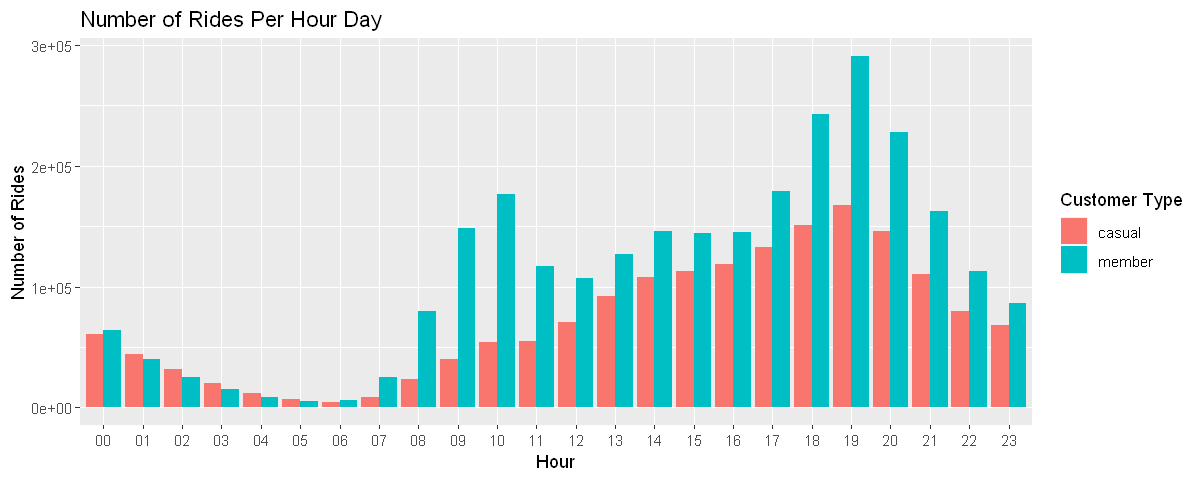

In [138]:
# Visualize Number_of_rides by Hour
fig(10,4)
trip_data %>% 
    group_by(customer_type, hour) %>% 
    summarise(number_of_rides = n(), average_duration = mean(ride_time)) %>% 
    arrange(customer_type, hour) %>% 
    ggplot(aes(x = hour, y =number_of_rides , fill = customer_type))+
    geom_col(position = position_dodge(width = 0.9))+
    labs(x = "Hour", y = "Number of Rides", fill = "Customer Type", title = "Number of Rides Per Hour Day")


We can see:
* We have more casual riders from 1am to 5am.
* The biggest volume of the data is between 5pm and 8pm (maybe because it's end of the work hours).

Let's divide the above chart across the all the weekdays 

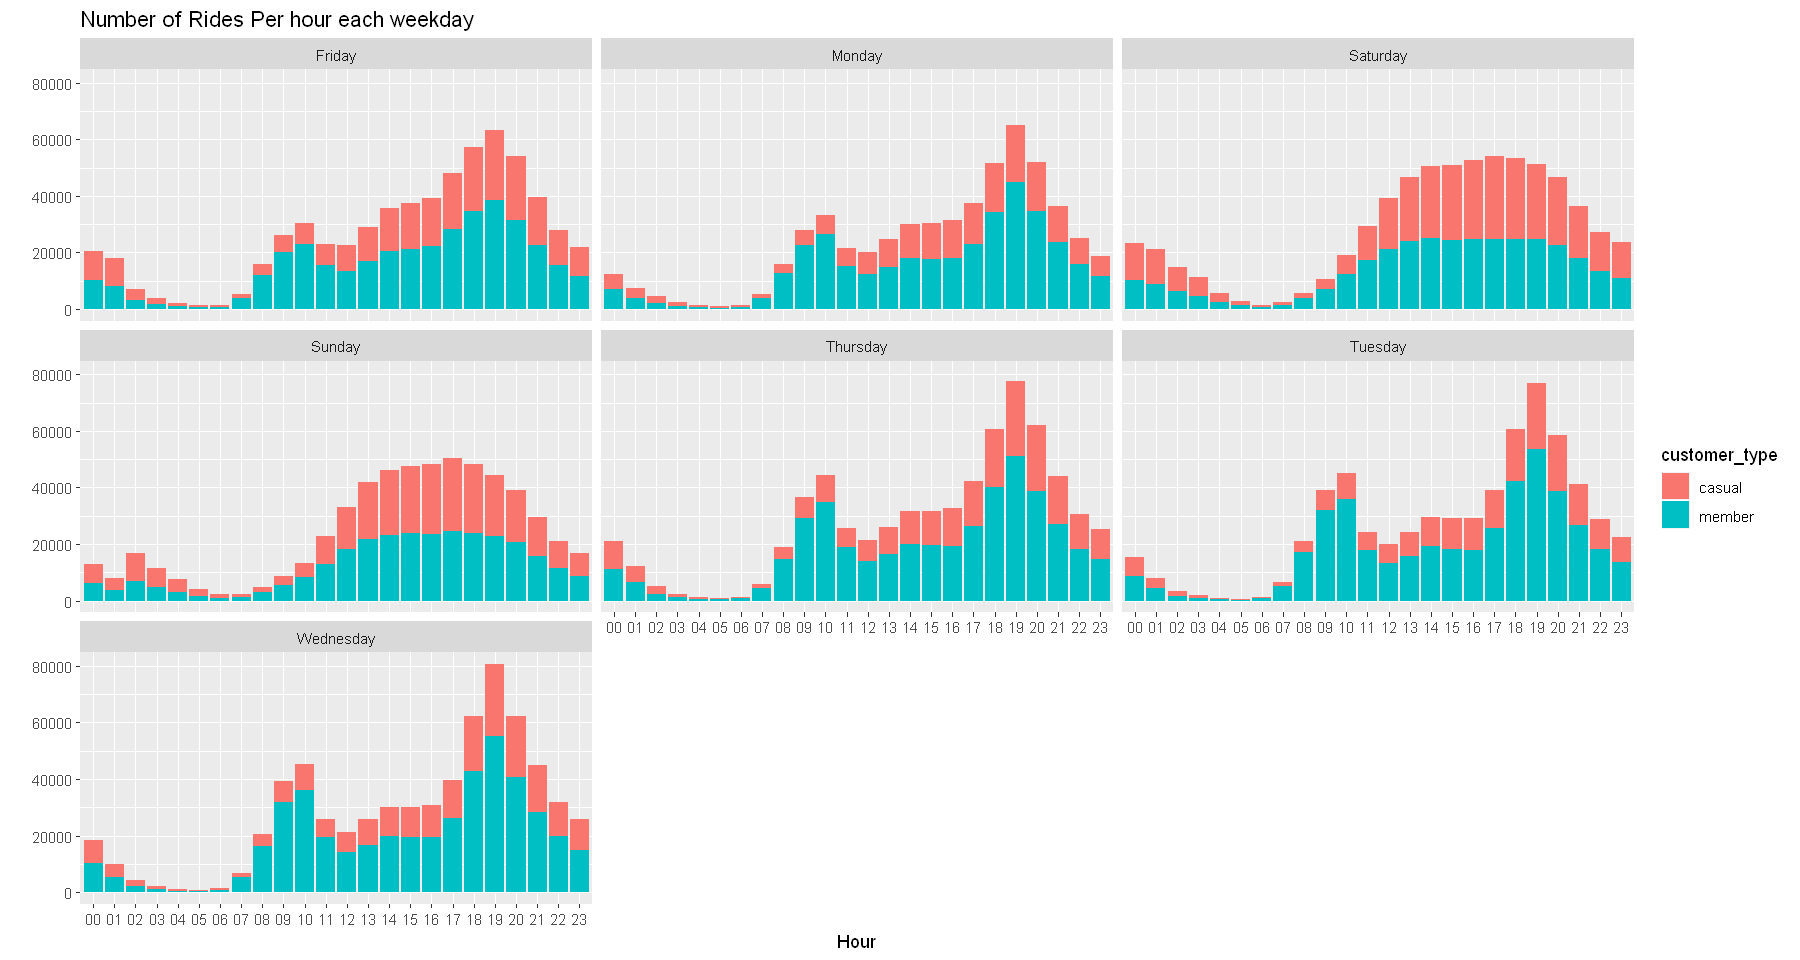

In [154]:
# Visualize Number_of_rides by Hour per weekday
fig(15,8)
trip_data %>% 
    ggplot(aes(hour, fill = customer_type))+
    geom_bar()+
     labs(x = "Hour",y = "", title = "Number of Rides Per hour each weekday")+
    facet_wrap(~weekday)

We will take some interesting **Notes** from this chart:
* At the weekend we have smooth distribution of the data, But steep data flow at midweek 
* During the midweek days we got a big increase of data points from 7am to 10am, then it's gets normal again.
* At the weekend we have more casual riders unless the midweek

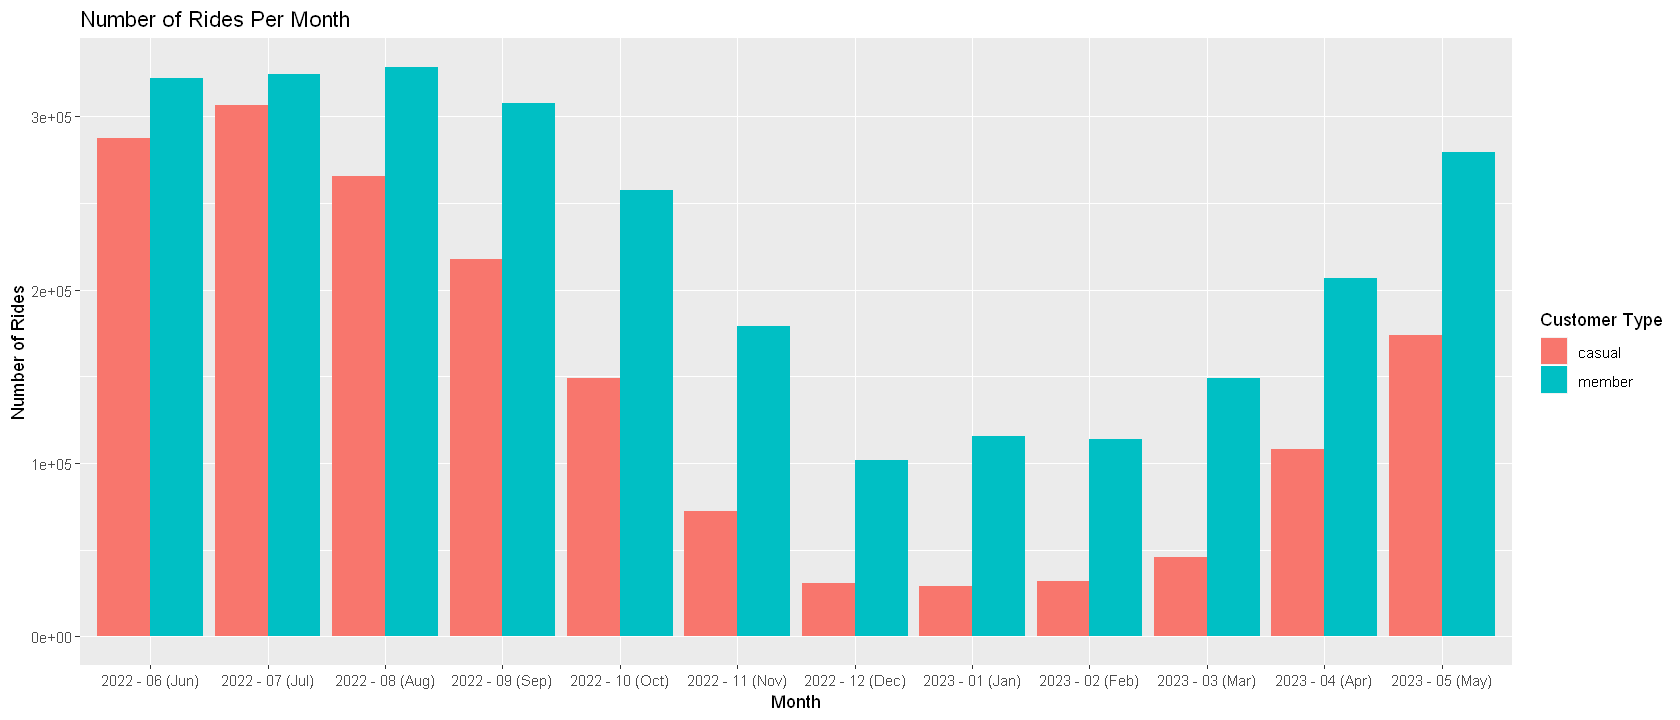

In [119]:
# Visualize Number_of_rides by months
fig(14,6)
trip_data %>% 
    group_by(customer_type, month) %>% 
    summarise(number_of_rides = n(), average_duration = mean(ride_time)) %>% 
    arrange(customer_type, month) %>% 
    ggplot(aes(x = month, y =number_of_rides , fill = customer_type))+
    geom_col(position = position_dodge(width = 0.9))+
    labs(x = "Month", y = "Number of Rides", fill = "Customer Type", title = "Number of Rides Per Month")

* Members have more distribution over all months  
* The biggest month that got most data points was 2022 - 08 (August) 

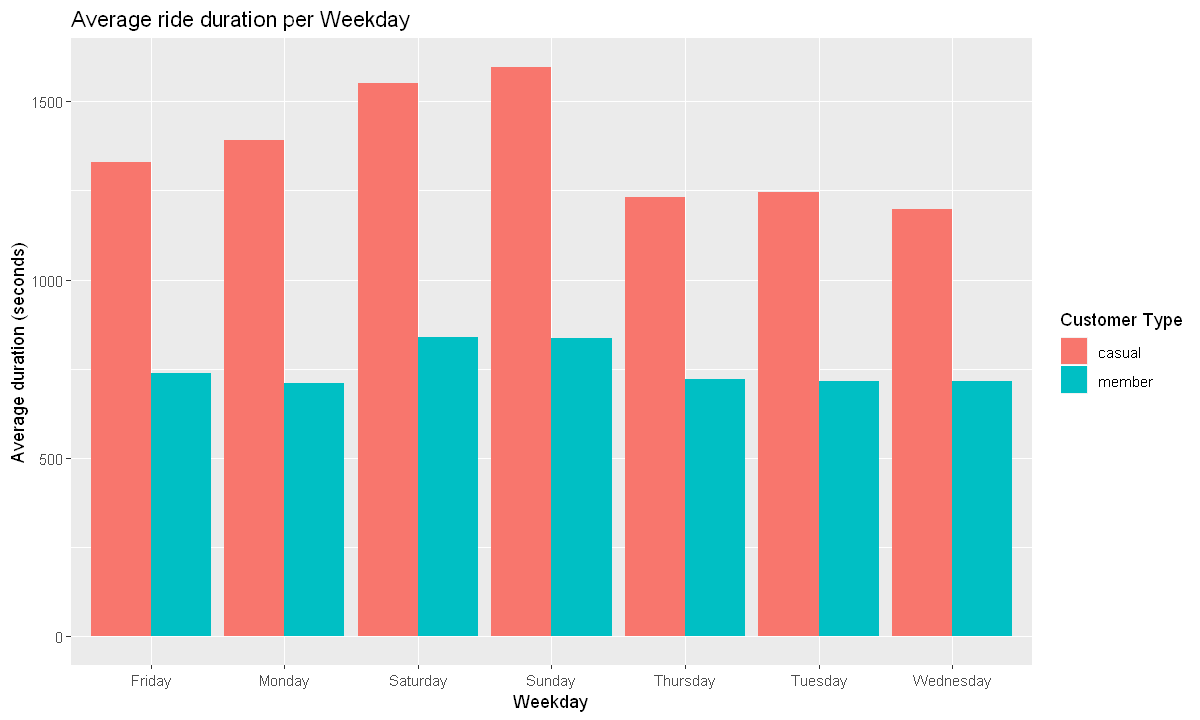

In [163]:
# Visualize average duration by weekdays
fig(10,6)
trip_data %>% 
    group_by(customer_type, weekday) %>% 
    summarise(average_duration = mean(ride_time)) %>% 
    arrange(customer_type, weekday) %>% 
    ggplot(aes(x = weekday , y = average_duration, fill = customer_type))+
    geom_col(position = position_dodge(width = 0.9))+
    labs(x = "Weekday", y = "Average duration (seconds)", fill = "Customer Type", title = "Average ride duration per Weekday")


We can see:
* That casual riders have more average ride time than members.
* Casual riders especially have a bigger flow at the weekend.

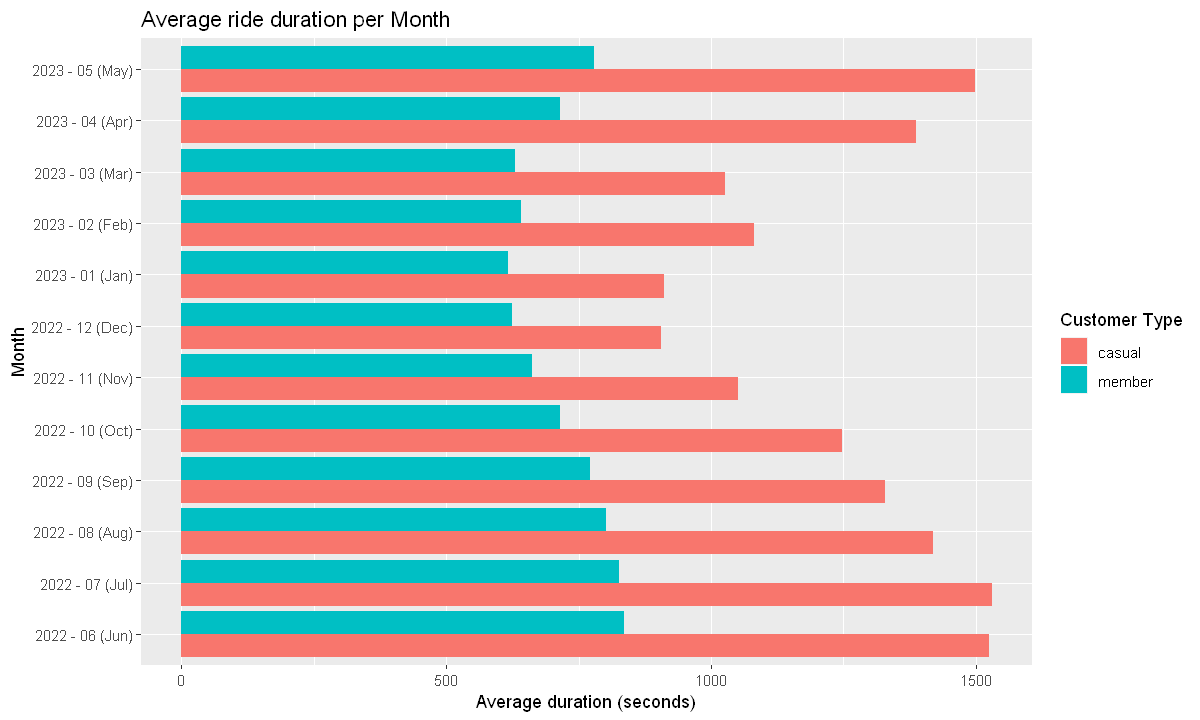

In [160]:
# Visualize average duration by months
fig(10,6)
trip_data %>% 
    group_by(customer_type, month) %>% 
    summarise(average_duration = mean(ride_time)) %>% 
    arrange(customer_type, month) %>% 
    ggplot(aes(x = month , y = average_duration, fill = customer_type))+
    geom_col(position = position_dodge(width = 0.9))+
    labs(x = "Month", y = "Average duration (seconds)", fill = "Customer Type", title = "Average ride duration per Month")+
    coord_flip() # To flip the coordinates for better vision

It's clear to see that:
* Casuals got more data points across all months.
* The bigger data flow happening at those months (5-6-7) *each year*
---
Now let's consider another factors that could affect our analysis Like the `bike_type`, And how this differs between each customer type

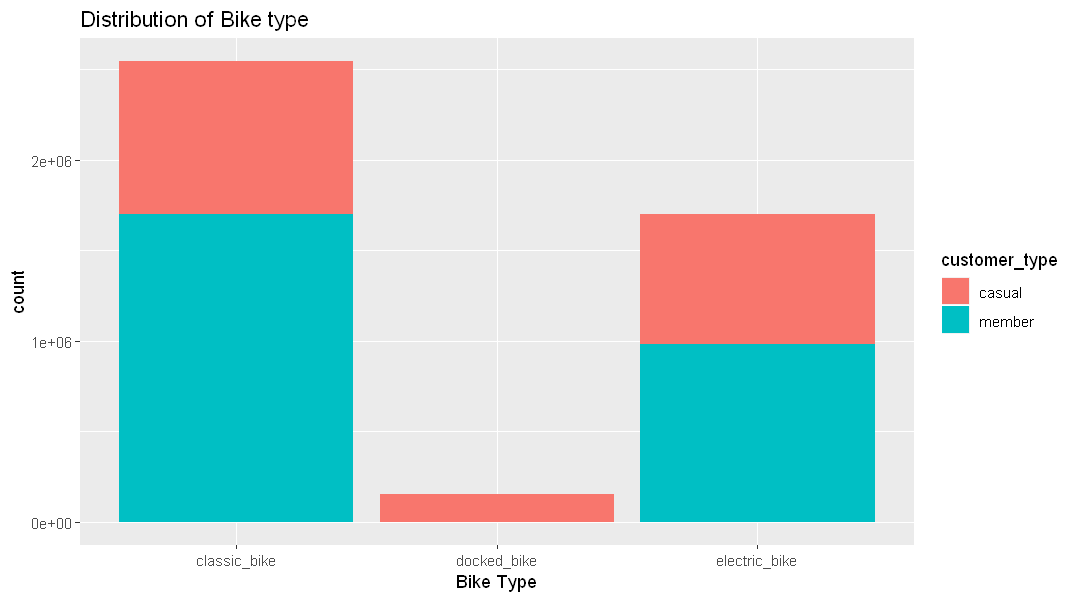

In [180]:
#Visualize Ride Type per customer
fig(9,5)
ggplot(trip_data, aes(bike_type, fill = customer_type))+
    geom_bar()+
    labs(x = "Bike Type", title = "Distribution of Bike type")

Important to note that:
* Members **NOT** riding docked Bikes
* The most bike used is the classic one:
    * Members using it more than Casual riders
* Docked Bikes usually used, And by causal riders only

During the Share phase we discover alot of key findings and insights. Let's get into the next step.

## Act

The act phase is all about acting on our key findings.

**Conclusions**:

  * Annual members constitute the majority of riders, while casual riders represent a smaller portion of the user base.
  * Annual members show higher participation on weekdays, indicating regular commuting or consistent usage patterns.
  * Casual riders have more rides on weekends, suggesting leisure or recreational use.
  * Average ride durations may differ between annual members and casual riders.
  * Docked bikes are commonly used by annual members, while casual riders prefer classic bikes.
  * There may be variations in the preferred time of day for riding between the two groups.
  * The data may also reveal differences in the preferred months for riding.
   
**Recommendations for the Marketing Team**:

* Develop weekday-focused marketing campaigns to further encourage annual members to use Cyclistic bikes. Highlight the convenience, time-saving benefits, and cost-effectiveness of commuting with Cyclistic

* Create special packages or promotions targeting casual riders for weekend leisure activities. Collaborate with local businesses, attractions, or events to offer exclusive deals or partnerships. Emphasize the enjoyment, exploration, and fun aspects of using Cyclistic bikes on weekends.

*  Consider offering customized bike options based on user preferences. Provide annual members with the choice of docked bikes or classic bikes, catering to their specific needs. This customization can enhance user satisfaction and encourage continued usage.